### Name : Hirui Ayodya
### Index Number : 190065K

### Question 1
Compare the effects of 9 × 9 average (box) filtering and Gaussian filtering with a 9 × 9 kernel and σ = 4. Use the butterfly image shown in Fig.1

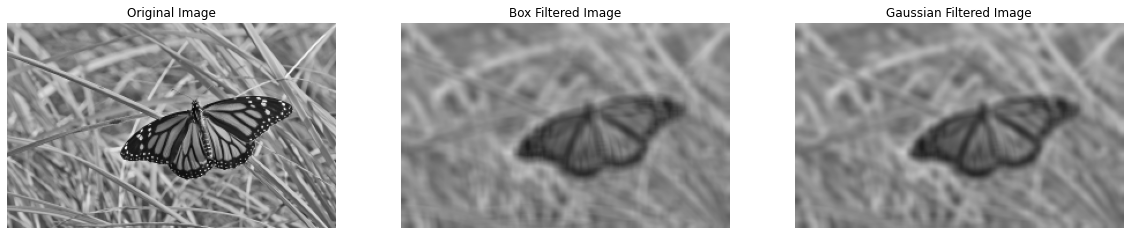

In [138]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert Img is not None

kernel_1 = np.ones((9,9))/81
box_Img = cv.filter2D( Img, -1, kernel_1)

kernel_2 = cv.getGaussianKernel(9,4)
gaus_Img = cv.sepFilter2D(Img, -1, kernel_2, kernel_2)

figure, axis = plt.subplots(1,3)
figure.set_figwidth(20)

axis[0].imshow(cv.cvtColor(Img, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(cv.cvtColor(box_Img, cv.COLOR_BGR2RGB))
axis[1].axis('off')
axis[1].title.set_text('Box Filtered Image')
axis[2].imshow(cv.cvtColor(gaus_Img, cv.COLOR_BGR2RGB))
axis[2].axis('off')
axis[2].title.set_text('Gaussian Filtered Image')
plt.show()

### Question 2
Create a Gaussian kernel x, y ∈ [−5, 5] with σ = 1 and show as a surface plot. Use a spatial resolution of 0.1

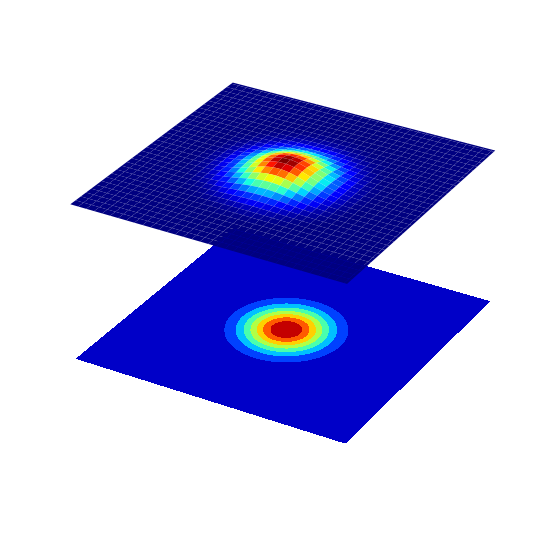

In [124]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

sigma = 1
x = np.arange(-5, 5.1, 0.1)
y = np.arange(-5, 5.1, 0.1)
X,Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))*(1/(2*np.pi*sigma**2))

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

surface = ax.plot_surface(X, Y, Z, cmap = cm.jet, linewidth = 0 , antialiased = True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
                               
cset = ax.contourf(X, Y, Z, zdir = 'z', offset = np.min(Z)-1.5 , cmap = cm.jet)
ax.set_zlim(np.min(Z)-2, np.max(Z))

plt.axis('off')
plt.show()

### Question 3
Consider the image shown in Fig.2 <br>
(a) Compute and show the x and y gradients of the contact lens image. Use the
Sobel kernels <br>
(b) Show the gradient magnitude image

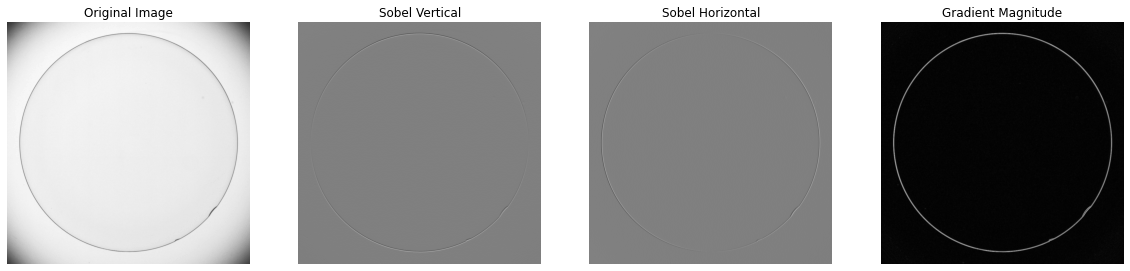

In [177]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('contact_lens.tif', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert Img is not None

kernel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype = 'float32')
f_x = cv.filter2D(Img, -1, kernel_v)

kernel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = 'float32')
f_y = cv.filter2D(Img, -1, kernel_h)
grad_mag = np.sqrt(f_x**2 + f_y**2)

figure, axis = plt.subplots(1,4, figsize = (20,20))

axis[0].imshow(Img, cmap = 'gray', vmin = 0, vmax = 255)
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(f_x, cmap = 'gray', vmin = -1020, vmax = 1020)
axis[1].axis('off')
axis[1].title.set_text('Sobel Vertical')
axis[2].imshow(f_y, cmap = 'gray', vmin = -1020, vmax = 1020)
axis[2].axis('off')
axis[2].title.set_text('Sobel Horizontal')
axis[3].imshow(grad_mag, cmap = 'gray')
axis[3].axis('off')
axis[3].title.set_text('Gradient Magnitude')
plt.show()

### Question 4
Carry out image sharpening on the graysclae version of the image shown in Fig.

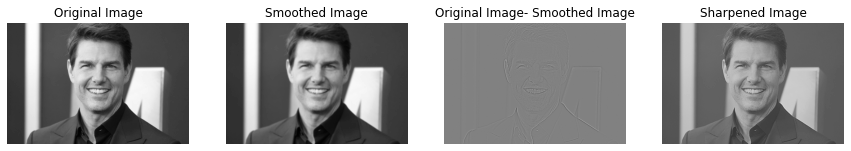

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('tom.jpg', cv.IMREAD_GRAYSCALE)
assert Img is not None

sigma = 2
kernel = cv.getGaussianKernel(5,sigma)
blurred = cv.sepFilter2D(Img, -1, kernel, kernel, anchor = (-1,-1), delta = 0 , borderType = cv.BORDER_REPLICATE)
difference = Img.astype('float32') - blurred.astype('float32')
sharpened = cv.addWeighted(Img.astype('float32'), 1.0, difference, 1.5, 0)

figure, axis = plt.subplots(1,4, figsize = (18,6))
figure.set_figwidth(15)

axis[0].imshow(Img, cmap = 'gray')
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(blurred, cmap = 'gray')
axis[1].axis('off')
axis[1].title.set_text('Smoothed Image')
axis[2].imshow(difference, cmap = 'gray')
axis[2].axis('off')
axis[2].title.set_text('Original Image- Smoothed Image')
axis[3].imshow(sharpened, cmap = 'gray')
axis[3].axis('off')
axis[3].title.set_text('Sharpened Image')
plt.show()